In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import compute_charge_dist as fz

import time

%matplotlib inline


grain_size = 5
grain_type = "carbonaceous"

# Desktop
save_dir = "/home/jcibanezm/codes/run/ChargeStatisticsAnalysis/CR"
# Laptop
#save_dir = "/Users/juan/codes/run/Silcc/CF_Prabesh/ChargeDist"
filename = "fz_%.3iAA_%s_CR.pkl"%(grain_size, grain_type) 
# Read a pickle file.

pkl_file    = open("%s/%s"%(save_dir, filename), "rb")
cdist_small = pickle.load(pkl_file)
pkl_file.close


<function close>

In [2]:
grain_type = "carbonaceous"

dist = "small"
grain_size = 5
cdist = cdist_small

In [3]:
GTn = cdist["G"] * np.sqrt(cdist["temp"]) / cdist["ne"] 

GTn_min = np.min(GTn)
GTn_max = np.max(GTn)

zmean_min = np.min(cdist["zmean"])
zmean_max = np.max(cdist["zmean"])

In [4]:
# New function including powers between -3, 3
# def function(x,alpha1, beta1, gamma1, alpha2, beta2, gamma2):
#def get_zpar(grain_size, x):

#    zmean      = grain_size/400.*np.sqrt(x) - grain_size/57.
#    neg        = np.argwhere(zmean<0)
#    zmean[neg] = 0
        
#    return zmean

In [5]:
# New function including powers between -3, 3
# def function(x,alpha1, beta1, gamma1, alpha2, beta2, gamma2):
def get_zpar(grain_size, x):

    zmean      = grain_size/400. * x**0.58 - grain_size/57.
    neg        = np.argwhere(zmean<0)
    zmean[neg] = 0
        
    return zmean

In [6]:
# New function including powers between -3, 3
# def function(x,alpha1, beta1, gamma1, alpha2, beta2, gamma2):
def get_zpar(grain_size, x):

    zmean      = grain_size/300.*x**0.42 - grain_size/57.
    #neg        = np.argwhere(zmean<0)
    #zmean[neg] = 0
        
    return zmean

In [7]:
GTn_arr   = np.arange(GTn_min, GTn_max)
zmean_arr = np.linspace(zmean_min, zmean_max, num=len(GTn_arr))

In [8]:
zmean_par = get_zpar(grain_size, GTn)

In [9]:
error   = np.median((np.fabs(cdist["zmean"] - zmean_par)/cdist["zmean"]))*100.

---

In [10]:
from scipy.optimize import curve_fit

In [11]:
# New function including powers between -3, 3
# def function(x,alpha1, beta1, gamma1, alpha2, beta2, gamma2):
def function(x, alpha1, aa, bb):

    GTn0 = aa*x[:]**(alpha1) + bb
    
    return GTn0

In [12]:
GTnpar = cdist["G"]*np.sqrt(cdist["temp"])/cdist["ne"]

In [13]:
popt3,   pcov3   = curve_fit(function, GTnpar, cdist["zmean"],   p0=[0.5, 0.5, -0.08])

In [14]:
print(popt3)

[ 0.34679519  0.0505025  -0.46147199]


In [15]:
print(len(cdist["zmean"]))
print(len(GTnpar))

429744
429744


In [18]:
print(popt3[0])
print(popt3[1])
print(popt3[2])

0.346795188364
0.0505024950593
-0.461471986357


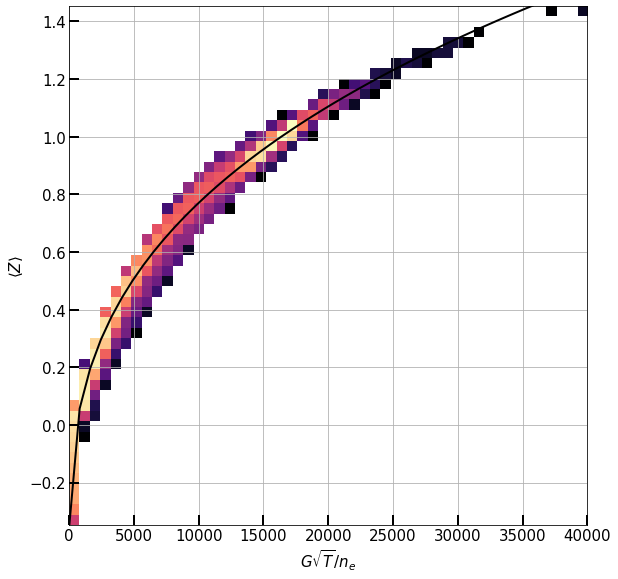

In [19]:
xsize = 8
ysize = 8

nfigs_x = 1
nfigs_y = 1

fig = plt.figure(figsize=(xsize, ysize))

hpad = 0.08
wpad = 0.09

xs_panel = 0.9 / nfigs_x 
ys_panel = 0.9 / nfigs_y 

############################################################################################################
############################               5 Angstroms             #######################################
############################################################################################################

ii = 0
jj = 0

ax = fig.add_axes([wpad + ii*xs_panel+ii*wpad, hpad + jj*ys_panel, xs_panel, ys_panel])

ax.hist2d(GTnpar, cdist["zmean"], bins=50, norm=LogNorm(), normed=True, cmap="magma")

#NewPar = [0.05* np.min(GTnpar)**0.34 - 0.46, 0.05* np.max(GTnpar)**0.34 - 0.46]
GTn_arr = np.linspace(np.min(GTnpar), np.max(GTnpar))
#NewPar = 0.05* GTn_arr**0.3467 - 0.46
NewPar = popt3[1]* GTn_arr**popt3[0] + popt3[2]

ax.plot(GTn_arr, NewPar, "-k", linewidth=2)

#ax.scatter(GTnpar, cdist["zmean"])


ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

#ax.set_xlabel("$a_{400}$ $(G\\sqrt{T} / n_{e})^{0.58}$ - $a_{57}$", fontsize=15)
ax.set_xlabel("$G\\sqrt{T} / n_{e}$", fontsize=15)
ax.set_ylabel("$\\langle Z \\rangle$", fontsize=15)

ax.grid("on")

fig.show()

#fig.savefig("/home/jcibanezm/Dropbox/Projects/Papers/In_Progress/ChargeDist_Dust/Figures/New_Parameters_%iAA.pdf"%grain_size, format="pdf")

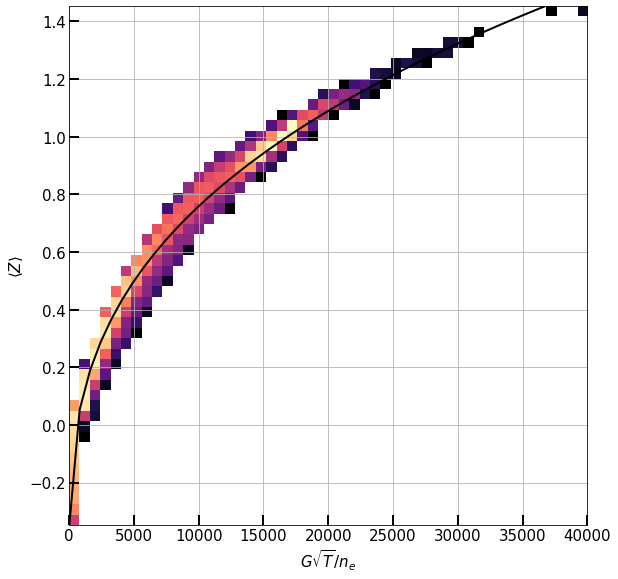

In [26]:
xsize = 8
ysize = 8

nfigs_x = 1
nfigs_y = 1

fig = plt.figure(figsize=(xsize, ysize))

hpad = 0.08
wpad = 0.09

xs_panel = 0.9 / nfigs_x 
ys_panel = 0.9 / nfigs_y 

############################################################################################################
############################               5 Angstroms             #######################################
############################################################################################################

ii = 0
jj = 0

ax = fig.add_axes([wpad + ii*xs_panel+ii*wpad, hpad + jj*ys_panel, xs_panel, ys_panel])

ax.hist2d(GTnpar, cdist["zmean"], bins=50, norm=LogNorm(), normed=True, cmap="magma")

#NewPar = [0.05* np.min(GTnpar)**0.34 - 0.46, 0.05* np.max(GTnpar)**0.34 - 0.46]
GTn_arr = np.linspace(np.min(GTnpar), np.max(GTnpar))
NewPar = 0.05* GTn_arr**0.3467 - 0.46

ax.plot(GTn_arr, NewPar, "-k", linewidth=2)

#ax.scatter(GTnpar, cdist["zmean"])


ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

#ax.set_xlabel("$a_{400}$ $(G\\sqrt{T} / n_{e})^{0.58}$ - $a_{57}$", fontsize=15)
ax.set_xlabel("$G\\sqrt{T} / n_{e}$", fontsize=15)
ax.set_ylabel("$\\langle Z \\rangle$", fontsize=15)

ax.grid("on")

fig.show()

fig.savefig("/home/jcibanezm/Dropbox/Projects/Papers/In_Progress/ChargeDist_Dust/Figures/New_Parameters_%iAA.pdf"%grain_size, format="pdf")



---

## Now Do a Bayesian parameter estimation

In [33]:
import emcee

In [34]:
# Define our posterior using Python functions
# for clarity, I've separated-out the prior and likelihood
# but this is not necessary. Note that emcee requires log-posterior

def log_prior(theta):
    alpha, beta, gamma, sigma = theta
    if sigma < 0:
        return -np.inf  # log(0)
    else:
        return - np.log(sigma)

def log_likelihood(theta, x, y):
    alpha, beta, gamma, sigma = theta
    y_model = -alpha + beta * x**gamma
    return -0.5 * np.sum(np.log(2 * np.pi * sigma ** 2) + (y - y_model) ** 2 / sigma ** 2)

def log_posterior(theta, x, y):
    return log_prior(theta) + log_likelihood(theta, x, y)

In [35]:
# Here we'll set up the computation. emcee combines multiple "walkers",
# each of which is its own MCMC chain. The number of trace results will
# be nwalkers * nsteps

ndim = 4       # number of parameters in the model
nwalkers = 50  # number of MCMC walkers
nburn = 1000   # "burn-in" period to let chains stabilize
nsteps = 2000  # number of MCMC steps to take

# set theta near the maximum likelihood, with 
np.random.seed(0)
starting_guesses = np.random.random((nwalkers, ndim))

In [36]:
# Here's the function call where all the work happens:
# we'll time it using IPython's %time magic

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[GTnpar, cdist["zmean"]])
%time sampler.run_mcmc(starting_guesses, nsteps)
print("done")

CPU times: user 51min 24s, sys: 364 ms, total: 51min 24s
Wall time: 51min 31s
done


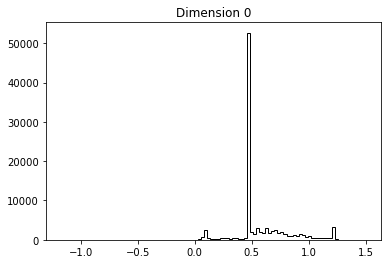

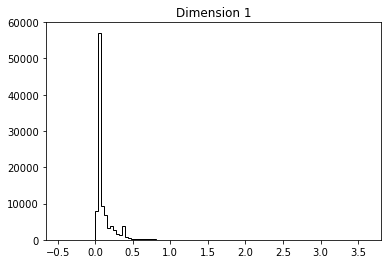

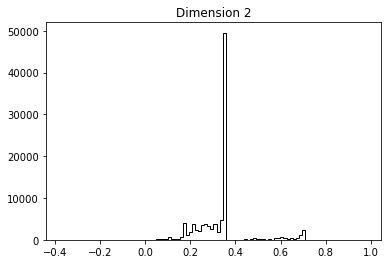

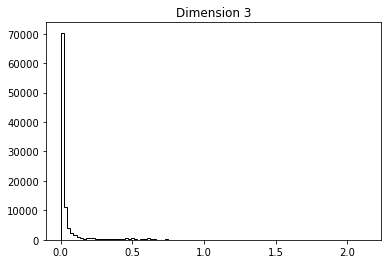

In [37]:
for i in range(ndim):
    pl.figure()
    pl.hist(sampler.flatchain[:,i], 100, color="k", histtype="step")
    pl.title("Dimension {0:d}".format(i))

pl.show()

In [39]:
grain_size = 100
grain_type = "carbonaceous"

# Desktop
save_dir = "/home/jcibanezm/codes/run/ChargeStatisticsAnalysis/CR"
# Laptop
#save_dir = "/Users/juan/codes/run/Silcc/CF_Prabesh/ChargeDist"
filename = "fz_%.3iAA_%s_CR_True.pkl"%(grain_size, grain_type) 
# Read a pickle file.

pkl_file    = open("%s/%s"%(save_dir, filename), "rb")
cdist_int = pickle.load(pkl_file)
pkl_file.close

grain_type = "carbonaceous"

dist = "int"
grain_size = 100
cdist = cdist_int

GTn = cdist["G"] * np.sqrt(cdist["temp"]) / cdist["ne"] 

GTnpar = cdist["G"]*np.sqrt(cdist["temp"])/cdist["ne"]

GTn_min = np.min(GTn)
GTn_max = np.max(GTn)

zmean_min = np.min(cdist["zmean"])
zmean_max = np.max(cdist["zmean"])

# Here we'll set up the computation. emcee combines multiple "walkers",
# each of which is its own MCMC chain. The number of trace results will
# be nwalkers * nsteps

In [40]:
ndim = 4       # number of parameters in the model
nwalkers = 250  # number of MCMC walkers
nburn = 1000   # "burn-in" period to let chains stabilize
nsteps = 2000  # number of MCMC steps to take

# set theta near the maximum likelihood, with 
np.random.seed(0)
starting_guesses = np.random.random((nwalkers, ndim))

# Here's the function call where all the work happens:
# we'll time it using IPython's %time magic

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[GTnpar, cdist["zmean"]])
%time sampler.run_mcmc(starting_guesses, nsteps)
print("done")

/home/jcibanezm/codes/libs/miniconda3/lib/python2.7/site-packages/ipykernel/__main__.py:15: RuntimeWarning: overflow encountered in square
/home/jcibanezm/codes/libs/miniconda3/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: overflow encountered in power
/home/jcibanezm/codes/libs/miniconda3/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: overflow encountered in multiply
/home/jcibanezm/codes/libs/miniconda3/lib/python2.7/site-packages/ipykernel/__main__.py:15: RuntimeWarning: overflow encountered in divide


CPU times: user 51min 1s, sys: 188 ms, total: 51min 2s
Wall time: 51min 10s
done


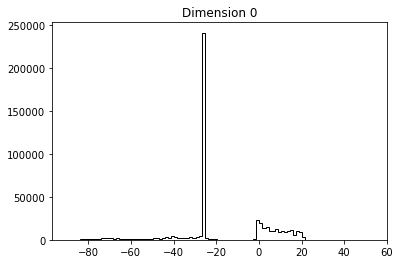

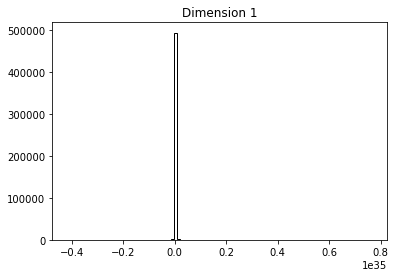

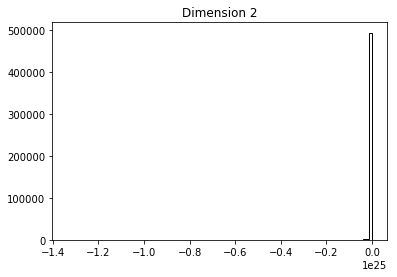

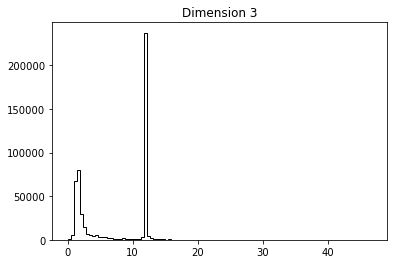

In [41]:
for i in range(ndim):
    pl.figure()
    pl.hist(sampler.flatchain[:,i], 100, color="k", histtype="step")
    pl.title("Dimension {0:d}".format(i))

pl.show()

In [24]:
print(error)

10.7002729794


/home/jcibanezm/codes/libs/miniconda3/lib/python2.7/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


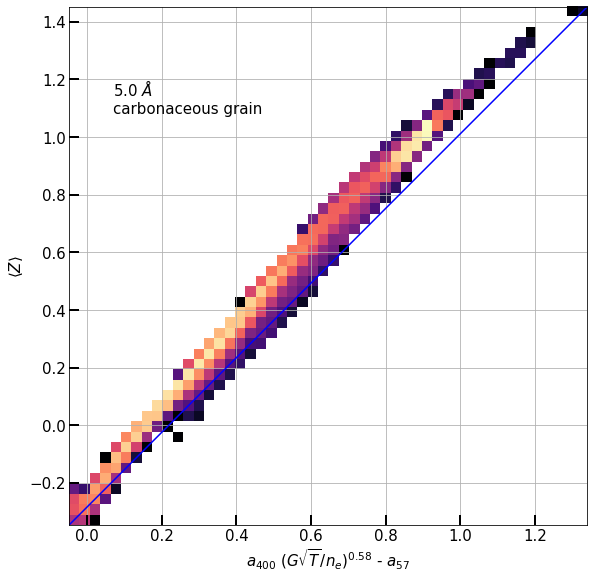

In [25]:
xsize = 8
ysize = 8

nfigs_x = 1
nfigs_y = 1

fig = plt.figure(figsize=(xsize, ysize))

hpad = 0.08
wpad = 0.09

xs_panel = 0.9 / nfigs_x 
ys_panel = 0.9 / nfigs_y 

############################################################################################################
############################               5 Angstroms             #######################################
############################################################################################################

ii = 0
jj = 0

ax = fig.add_axes([wpad + ii*xs_panel+ii*wpad, hpad + jj*ys_panel, xs_panel, ys_panel])

ax.hist2d(zmean_par, cdist["zmean"], bins=50, norm=LogNorm(), normed=True, cmap="magma")
#ax.plot(aaa, zzz, "-b", linewidth=2)
ax.plot([np.min(zmean_par), np.max(zmean_par)], [np.min(cdist["zmean"]), np.max(cdist["zmean"])], "-b")


ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

ax.set_xlabel("$a_{400}$ $(G\\sqrt{T} / n_{e})^{0.58}$ - $a_{57}$", fontsize=15)
ax.set_ylabel("$\\langle Z \\rangle$", fontsize=15)

ax.grid("on")

error   = np.median((np.fabs(cdist["zmean"] - zmean_par)/cdist["zmean"]))*100.

deltaZpar = np.max(zmean_par) - np.min(zmean_par)
deltazmean = np.max(cdist["zmean"]) - np.min(cdist["zmean"])

ax.text(0.05*deltaZpar, 0.6*deltazmean, "%.1f $\\AA$\n%s grain"%(grain_size, grain_type), fontsize=15)
#ax.text(0.05*deltaZpar, 0.8*deltazmean, "%.1f $\\AA$\n%s grain\nerror = %.2f%s"%(grain_size, grain_type, error, "%"), fontsize=15)
ax.set_xlim(np.min(zmean_par), np.max(zmean_par))
ax.set_ylim(np.min(cdist["zmean"]), np.max(cdist["zmean"]))
#ax.set_ylim(0.1, 4)

#ax.text(0.2, 2.2, "%.2i $\\AA$\n%s"%(grain_size, grain_type), fontsize=15)
#ax.text(1000, 0.8*np.max(zmean), "%.2i $\\AA$\n%s"%(grain_size, grain_type), fontsize=15)


fig.show()

#savedir = "/home/jcibanezm/codes/DustAnalysis/Charge/Figures/ChargingParameter"

#fig.savefig("/home/jcibanezm/Dropbox/Projects/Papers/In_Progress/ChargeDist_Dust/Figures/Figure_6_%iAA_NewParameters.pdf"%grain_size, format="pdf")
